In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



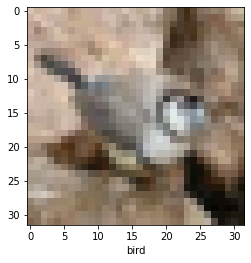

In [ ]:
img_index = 90

plt.imshow(train_images[img_index], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img_index][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

**Layer 1** - input shape of data will be 32, 32, 3, ans we will process 2 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolutional operation. 

**Layer 2** - layer will perform the max pooling operation using 2x2 samples and stride of 2

**Other layers** - takes feature map  from previous layer and increase frequency filters from 32 to 64. 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuarcy'])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5216 - accuracy: 0.4448 - val_loss: 1.3013 - val_accuracy: 0.5351
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1715 - accuracy: 0.5862 - val_loss: 1.0695 - val_accuracy: 0.6182
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0284 - accuracy: 0.6390 - val_loss: 1.0505 - val_accuracy: 0.6285
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9345 - accuracy: 0.6740 - val_loss: 0.9451 - val_accuracy: 0.6687
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8582 - accuracy: 0.7008 - val_loss: 0.9517 - val_accuracy: 0.6739
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8119 - accuracy: 0.7170 - val_loss: 0.8961 - val_accuracy: 0.6913
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7682 - accuracy: 0.7316 - val_loss: 1.0567 - val_accuracy:

In [ ]:
# evaluating the model
